# ***Feature Engineering***

## **Importing Packages**

In [21]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Setting plot style
sns.set(color_codes=True)

In [23]:
# Installing gdown
!pip install gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
# Importing data using gdown
!gdown 1kqP1CB01st3UGnQeDayCbsJeAx4WpDxI
!gdown 1lk-beXjmC-6MnLNym93DhtiZBXeAU8vE
!gdown 1S383LTjXg8s_XavGqQbLAvcfOFvh3Iwc
!gdown 1ghtLaor4tKXVmlh1ANRUwXzCw1VdyDkf

Downloading...
From: https://drive.google.com/uc?id=1kqP1CB01st3UGnQeDayCbsJeAx4WpDxI
To: /content/cleaned_data.csv
100% 7.17M/7.17M [00:00<00:00, 95.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lk-beXjmC-6MnLNym93DhtiZBXeAU8vE
To: /content/price_data.csv
100% 18.3M/18.3M [00:00<00:00, 84.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1S383LTjXg8s_XavGqQbLAvcfOFvh3Iwc
To: /content/client_data.csv
100% 3.49M/3.49M [00:00<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ghtLaor4tKXVmlh1ANRUwXzCw1VdyDkf
To: /content/pre_processed_data.csv
100% 8.60M/8.60M [00:00<00:00, 82.4MB/s]


---
## **Loading data**

In [25]:
# Loading Data
df = pd.read_csv('/content/pre_processed_data.csv')
df = df.iloc[:,1:]

In [26]:
# Printing first 5 rows of the DataFrame
df.head(5)

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## **Modelling**



In [27]:
# Importing Required Modules
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

### *Splitting Data into Train & Test Sets*

In [28]:
# Making a copy of the data
train_df = df.copy()

# Defining X & Y
y = df['churn']
X = df.drop(columns=['id', 'churn'])

# Printing Shapes of the DataFrames
print(X.shape)
print(y.shape)

(14606, 57)
(14606,)


In [29]:
# Splitting into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Printing Shapes of the DataFrames
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 57)
(10954,)
(3652, 57)
(3652,)


### *Model training*

The chosen approach for tackling this problem involves implementing a Random Forest classifier. Falling under the category of ensemble algorithms, the Forest is composed of multiple Decision Trees, which are tree-based learning algorithms. The strength of an ensemble algorithm is attributed to the laws of averaging, weak learners, and the central limit theorem.

When presented with a sample of data and set of parameters, a single decision tree can identify patterns within the data, albeit with the possibility of overfitting or underfitting. However, by increasing the number of learners, the performance of the random forest should converge to the optimal solution.

In [30]:
# Fitting the Model / Training the Model
model = RandomForestClassifier(
    n_estimators=1000
)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)


Setting n_estimators to 1000 signifies that the random forest will comprise 1000 decision trees.

### *Evaluation*

In evaluating the performance of the Random Forest Classifier, we will be utilizing three metrics:

Accuracy, which pertains to the ratio of correctly predicted observations to the total observations.
Precision, which gauges the ability of the classifier to refrain from labeling negative samples as positive.
Recall, which assesses the classifier's capacity to detect all positive samples.
We have opted to incorporate these three metrics in our evaluation process due to the insufficiency of simple accuracy as a suitable measure in cases where predicting 1s or 0s is critical.

In [31]:
# Storing the Predictions
predictions = model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [32]:
# Number of 0s and 1s in Test Set
y_test.value_counts()

0    3286
1     366
Name: churn, dtype: int64

In [33]:
print(f"True Positives: {tp}")
print(f"False Positives: {fp}")
print(f"True Negatives: {tn}")
print(f"False Negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True Positives: 17
False Positives: 3
True Negatives: 3283
False Negatives: 349

Accuracy: 0.9036144578313253
Precision: 0.85
Recall: 0.04644808743169399


### *Analysis*

* In the test dataset, approximately 10% of the rows represent churners (churn = 1). The true negative count is excellent, with 3282 out of 3286 cases correctly identified as negative (churn = 0). On the other hand, the false negative count is high at 348, meaning that we predicted 348 clients as not churning when they actually did (churn = 1). This must be addressed to improve the model. The false positive count is only 4, which is excellent.

* The total true positive count is 18 out of 366 churners in the test dataset, indicating a poor ability to identify positive samples. The accuracy score is high but misleading; hence, we use precision and recall to evaluate the model. The precision score of 0.82 is decent but can be improved, whereas the recall score indicates the primary concern in improving the model.

* In summary, the model can accurately identify clients that do not churn, but it struggles to predict cases where clients do churn. There is a high percentage of cases where clients should be identified as churners but are instead classified as non-churners. This suggests that the current set of features is not sufficiently discriminative to distinguish between churners and non-churners.

### *Model understanding*

Feature importances convey the significance of a feature in the predictive model, and there are multiple approaches to compute this metric. When using the Random Forest classifier, feature importances can be obtained through the method built into the trained model. Specifically, in the case of Random Forest, the feature importance is a measure of how frequently each feature is employed for splitting across all the trees.

In [34]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

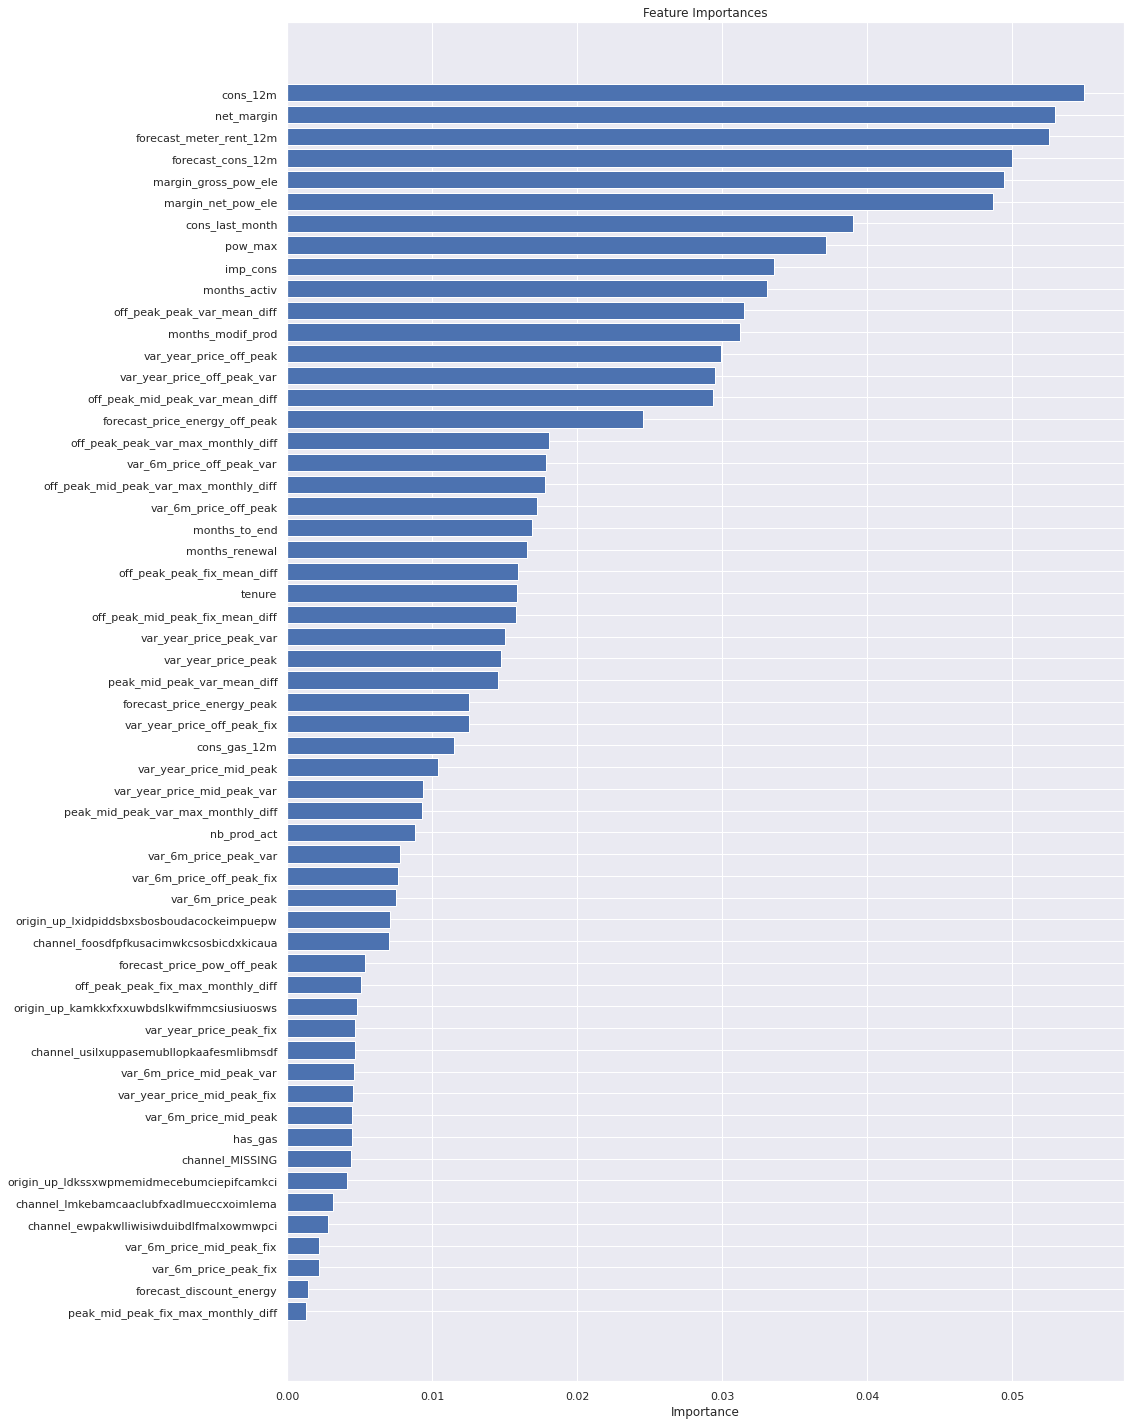

In [35]:
# Plotting Feature Importances
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

### *Observations*

* In this model, net margin and consumption over a 12-month period are the primary factors that drive churn.

* Margin on power subscription also has a significant impact on churn.

* Time-related factors, such as customer tenure, the duration of their contract, and the time since their contract was last updated, are influential in predicting churn.

* Price sensitivity features are present in the model but do not have a significant impact on customer churn.



### **Testing the Hypothesis**

    > Is churn driven by the customers' price sensitivity?

After analyzing the feature importances, it appears that the feature in question (price sensitivity) does not have a significant impact on the model's performance and can be considered a minor factor. Nonetheless, further experimentation is necessary to make a definitive conclusion.

In [36]:
# Storing Probabilities of Predictions
proba_predictions = model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [37]:
# Dropping Index Column
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [38]:
# Exporting Predictions to a .csv file
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('predictions.csv')